In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import datetime as dt
import time
import re
import matplotlib.pyplot as plt
import numpy

Most of you probably are playing a kind of fantasy futbol league like Biwenger, Comunio or Mister during this season. There are some web pages that can help us in order to set a good lineup for every week. We are going to scrape [Futbol Fantasy](https://www.futbolfantasy.com/) (only for learning purposes) which provide likely lineups for each team of Spanish Liga. We will use BeautifulSoup to scrape and Pandas to process data.

In [2]:
link = "https://www.futbolfantasy.com/"
futbol_fantasy = requests.get(link)
futbol_fantasy

<Response [200]>

Response 200 indicates that connection to the site was successfully. We are going to catch the static code of the web.

In [3]:
soup = BeautifulSoup(futbol_fantasy.content,'html.parser')

We see that all team names are inserted on tags like:

    <a alt="Huesca" class="team" data-tooltip="Huesca" href="https://www.futbolfantasy.com/laliga/equipos/huesca" title="Huesca">
    <img alt="Huesca" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/31.png"/>
    
So we are going to take all of them. First we will try with one team and so how BeautifulSoup works

In [4]:
soup.a #Only get the first tag a

<a href="https://www.futbolfantasy.com/laliga/home"><img alt="logo futbolfantasy" class="image-logo not-mini" src="https://static.futbolfantasy.com/uploads/images/logo2017.png"/><img alt="logo futbolfantasy mini" class="tiny-logo is-mini" src="https://static.futbolfantasy.com/uploads/images/logomini.png"/></a>

In [5]:
teams = soup.find_all("a", class_="team", href=True) #get a tag with class="team" id
print(teams) #return a list with different Beautiful classses that match 

[<a alt="Alavés" class="team" data-tooltip="Alavés" href="https://www.futbolfantasy.com/laliga/equipos/alaves" title="Alavés">
<img alt="Alavés" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/28.png"/>
</a>, <a alt="Athletic" class="team" data-tooltip="Athletic" href="https://www.futbolfantasy.com/laliga/equipos/athletic" title="Athletic">
<img alt="Athletic" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/1.png"/>
</a>, <a alt="Atlético" class="team" data-tooltip="Atlético" href="https://www.futbolfantasy.com/laliga/equipos/atletico" title="Atlético">
<img alt="Atlético" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/2.png"/>
</a>, <a alt="Barcelona" class="team" data-tooltip="Barcelona" href="https://www.futbolfantasy.com/laliga/equipos/barcelona" title="Barcelona">
<img alt="Barcelona" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/3.png"/>
</a>, <a alt="Betis" clas

In [6]:
print(type(teams))

<class 'bs4.element.ResultSet'>


In [7]:
print(type(teams[0])) #bs4.element.Tag for first team

<class 'bs4.element.Tag'>


In [9]:
dir(teams[0]) 

['__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings',
 'fetchParents',
 'fetchPrevious',
 'fetchPreviousSiblings',
 '

In [10]:
teams[0]

<a alt="Alavés" class="team" data-tooltip="Alavés" href="https://www.futbolfantasy.com/laliga/equipos/alaves" title="Alavés">
<img alt="Alavés" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/28.png"/>
</a>

In [11]:
teams[0].attrs

{'class': ['team'],
 'data-tooltip': 'Alavés',
 'href': 'https://www.futbolfantasy.com/laliga/equipos/alaves',
 'title': 'Alavés',
 'alt': 'Alavés'}

In [12]:
teams[0].get(key="title") #Get Name
#or
teams[0]["title"]

'Alavés'

In [13]:
teams[0].contents

['\n',
 <img alt="Alavés" class="escudo" src="https://static.futbolfantasy.com/uploads/images/cabecera/28.png"/>,
 '\n']

In [14]:
type(teams[0].contents[1])

bs4.element.Tag

In [15]:
teams[0].contents[1].attrs

{'class': ['escudo'],
 'src': 'https://static.futbolfantasy.com/uploads/images/cabecera/28.png',
 'alt': 'Alavés'}

In [16]:
teams[0].contents[1].attrs["src"]

'https://static.futbolfantasy.com/uploads/images/cabecera/28.png'

In [17]:
tms = [] 
links = []
logos = []

for team in teams:
    tms.append(team["title"])
    links.append(team["href"])
    logos.append(team.contents[1].attrs["src"])
    
df_teams = pd.DataFrame({"Team": tms, "Link" : links, "Logo" : logos})

In [18]:
df_teams.head()

,Team,Link,Logo
0,Alavés,https://www.futbolfantasy.com/laliga/equipos/a...,https://static.futbolfantasy.com/uploads/image...
1,Athletic,https://www.futbolfantasy.com/laliga/equipos/a...,https://static.futbolfantasy.com/uploads/image...
2,Atlético,https://www.futbolfantasy.com/laliga/equipos/a...,https://static.futbolfantasy.com/uploads/image...
3,Barcelona,https://www.futbolfantasy.com/laliga/equipos/b...,https://static.futbolfantasy.com/uploads/image...
4,Betis,https://www.futbolfantasy.com/laliga/equipos/b...,https://static.futbolfantasy.com/uploads/image...


In [19]:
df_teams.iloc[16]

Team                                              Sevilla
Link    https://www.futbolfantasy.com/laliga/equipos/s...
Logo    https://static.futbolfantasy.com/uploads/image...
Name: 16, dtype: object

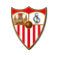

In [20]:
#logo for 17th team
import matplotlib.image as mpimg
img = mpimg.imread(df_teams.iloc[16]["Logo"])
plt.figure(figsize=(0.8,0.8))
plt.axis('off')
plt.imshow(img)
plt.show()

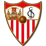

In [21]:
#with Pillow
from PIL import Image
import io
import urllib.request

fd = urllib.request.urlopen(df_teams.iloc[16]["Logo"])
image_file = io.BytesIO(fd.read())
im = Image.open(image_file)
im #.show() will open in our PC image viewer

We are going to explore the link for one team

In [22]:
team1_link = requests.get(df_teams.iloc[0]["Link"])
soup2 = BeautifulSoup(team1_link.content,'html.parser')
soup2

<!DOCTYPE html>

<html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=1015" name="viewport"/>
<title>Alavés - Alineaciones probables y noticias - FútbolFantasy</title>
<link href="/favicon/apple-touch-icon-57x57.png" rel="apple-touch-icon-precomposed" sizes="57x57"/>
<link href="/favicon/apple-touch-icon-114x114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/>
<link href="/favicon/apple-touch-icon-72x72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
<link href="/favicon/apple-touch-icon-144x144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="/favicon/apple-touch-icon-60x60.png" rel="apple-touch-icon-precomposed" sizes="60x60"/>
<link href="/favicon/apple-touch-icon-120x120.png" rel="apple-touch-icon-precomposed" sizes="120x120"/>
<link href="/favicon/apple-touch-icon-76x76.png" rel="apple-touch-icon-precomposed" sizes="76x76"/>
<link href="/favicon/apple-touch-icon-152x152.png" rel="apple-touch-icon-precomposed" sizes="152x152"/>


In [23]:
ply = soup2.find_all("a", class_="juggador", href=True)
ply

[<a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/fernando-pacheco">
 									Pacheco 
 											99%
 												</a>,
 <a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/ruben-duarte">
 									R. Duarte 
 											80%
 												</a>,
 <a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/florian-lejeune">
 									Lejeune 
 											90%
 												</a>,
 <a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/victor-laguardia">
 									Laguardia 
 											90%
 												</a>,
 <a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/ximo-navarro">
 									Ximo 
 											80%
 												</a>,
 <a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/rodrigo-battaglia">
 									Battaglia 
 											90%
 												</a>,
 <a class="juggador" 

In [24]:
p2 = ply[1]
p2

<a class="juggador" data-lesion="-1" href="https://www.futbolfantasy.com/laliga/jugadores/ruben-duarte">
									R. Duarte 
											80%
												</a>

In [25]:
p2.attrs

{'class': ['juggador'],
 'data-lesion': '-1',
 'href': 'https://www.futbolfantasy.com/laliga/jugadores/ruben-duarte'}

In [26]:
p2.contents #a little bit messy

['\r\n\t\t\t\t\t\t\t\t\tR. Duarte \r\n\t\t\t\t\t\t\t\t\t\t\t80%\r\n\t\t\t\t\t\t\t\t\t\t\t\t']

In [27]:
#using regex (regular expresions) and string methods
re.findall(r"[A-Za-z\u00C0-\u017F].*", p2.contents[0])[0].split("\r")[0].strip()

'R. Duarte'

In [28]:
int(re.findall(r'\d{1,2}', p2.contents[0].string)[0])

80

In [29]:
ply_alaves = []
pct_alaves = []
link_alaves = []
team_ala = []

for p in ply:
    team_ala.append("Alavés") 
    ply_alaves.append(re.findall(r"[A-Za-z\u00C0-\u017F].*", p.contents[0])[0].split("\r")[0].strip())
    pct_alaves.append(int(re.findall(r'\d{1,2}', p.contents[0].string)[0]))
    link_alaves.append(p.attrs["href"])
    
df_alaves = pd.DataFrame({"Team":team_ala, "Player":ply_alaves, "Play %":pct_alaves, "Link": link_alaves})
df_alaves

,Team,Player,Play %,Link
0,Alavés,Pacheco,99,https://www.futbolfantasy.com/laliga/jugadores...
1,Alavés,R. Duarte,80,https://www.futbolfantasy.com/laliga/jugadores...
2,Alavés,Lejeune,90,https://www.futbolfantasy.com/laliga/jugadores...
3,Alavés,Laguardia,90,https://www.futbolfantasy.com/laliga/jugadores...
4,Alavés,Ximo,80,https://www.futbolfantasy.com/laliga/jugadores...
5,Alavés,Battaglia,90,https://www.futbolfantasy.com/laliga/jugadores...
6,Alavés,Jota,80,https://www.futbolfantasy.com/laliga/jugadores...
7,Alavés,Pina,80,https://www.futbolfantasy.com/laliga/jugadores...
8,Alavés,Lucas Pérez,90,https://www.futbolfantasy.com/laliga/jugadores...
9,Alavés,Joselu,90,https://www.futbolfantasy.com/laliga/jugadores...


We are going to create a DataFrame with all possible lineups for all LaLiga teams.

In [30]:
pp = pd.DataFrame(columns=["Team", "Player", "Play %", "Link"])
pp = pp.append(df_alaves)
pp

,Team,Player,Play %,Link
0,Alavés,Pacheco,99,https://www.futbolfantasy.com/laliga/jugadores...
1,Alavés,R. Duarte,80,https://www.futbolfantasy.com/laliga/jugadores...
2,Alavés,Lejeune,90,https://www.futbolfantasy.com/laliga/jugadores...
3,Alavés,Laguardia,90,https://www.futbolfantasy.com/laliga/jugadores...
4,Alavés,Ximo,80,https://www.futbolfantasy.com/laliga/jugadores...
5,Alavés,Battaglia,90,https://www.futbolfantasy.com/laliga/jugadores...
6,Alavés,Jota,80,https://www.futbolfantasy.com/laliga/jugadores...
7,Alavés,Pina,80,https://www.futbolfantasy.com/laliga/jugadores...
8,Alavés,Lucas Pérez,90,https://www.futbolfantasy.com/laliga/jugadores...
9,Alavés,Joselu,90,https://www.futbolfantasy.com/laliga/jugadores...


To get all players for each team

In [31]:
for t,l in zip(df_teams["Team"], df_teams["Link"]):
    print(t,l)

Alavés https://www.futbolfantasy.com/laliga/equipos/alaves
Athletic https://www.futbolfantasy.com/laliga/equipos/athletic
Atlético https://www.futbolfantasy.com/laliga/equipos/atletico
Barcelona https://www.futbolfantasy.com/laliga/equipos/barcelona
Betis https://www.futbolfantasy.com/laliga/equipos/betis
Cádiz https://www.futbolfantasy.com/laliga/equipos/cadiz
Celta https://www.futbolfantasy.com/laliga/equipos/celta
Eibar https://www.futbolfantasy.com/laliga/equipos/eibar
Elche https://www.futbolfantasy.com/laliga/equipos/elche
Getafe https://www.futbolfantasy.com/laliga/equipos/getafe
Granada https://www.futbolfantasy.com/laliga/equipos/granada
Huesca https://www.futbolfantasy.com/laliga/equipos/huesca
Levante https://www.futbolfantasy.com/laliga/equipos/levante
Osasuna https://www.futbolfantasy.com/laliga/equipos/osasuna
Real Madrid https://www.futbolfantasy.com/laliga/equipos/real-madrid
Real Sociedad https://www.futbolfantasy.com/laliga/equipos/real-sociedad
Sevilla https://www.fu

In [33]:
ply_all = []
pct_all = []
link_all = []
team_all = []

for t,l in zip(df_teams["Team"], df_teams["Link"]):
    soup = BeautifulSoup(requests.get(l).content,'html.parser')
    pl = soup.find_all("a", class_="juggador", href=True)

    for p in pl:
        team_all.append(t) 
        ply_all.append(re.findall(r"[A-Za-z\u00C0-\u017F].*", p.contents[0])[0].split("\r")[0].strip())
        pct_all.append(int(re.findall(r'\d{1,2}', p.contents[0].string)[0]))
        link_all.append(p.attrs["href"])

    time.sleep(1)

df_lineups = pd.DataFrame({"Team":team_all, "Player":ply_all, "Play %":pct_all, "Link": link_all})

In [36]:
df_lineups[df_lineups["Team"] == "Villarreal"]

,Team,Player,Play %,Link
230,Villarreal,Asenjo,99,https://www.futbolfantasy.com/laliga/jugadores...
231,Villarreal,Mario,90,https://www.futbolfantasy.com/laliga/jugadores...
232,Villarreal,Kubo,80,https://www.futbolfantasy.com/laliga/jugadores...
233,Villarreal,Moi Gómez,99,https://www.futbolfantasy.com/laliga/jugadores...
234,Villarreal,Pau Torres,99,https://www.futbolfantasy.com/laliga/jugadores...
235,Villarreal,Trigueros,80,https://www.futbolfantasy.com/laliga/jugadores...
236,Villarreal,Coquelin,90,https://www.futbolfantasy.com/laliga/jugadores...
237,Villarreal,Alcácer,99,https://www.futbolfantasy.com/laliga/jugadores...
238,Villarreal,Iborra,99,https://www.futbolfantasy.com/laliga/jugadores...
239,Villarreal,Albiol,70,https://www.futbolfantasy.com/laliga/jugadores...


In [ ]:
# Save th information in files
df_teams.to_csv("data/ffantasy_teams.csv", index=False)
df_lineups.to_csv("data/ffantasy_lineups.csv", index=False)

Now we can load from the file without scraping again

In [37]:
df = pd.read_csv("data/ffantasy_lineups.csv")
df.tail()

,Team,Player,Play %,Link
237,Villarreal,Alcácer,99,https://www.futbolfantasy.com/laliga/jugadores...
238,Villarreal,Iborra,99,https://www.futbolfantasy.com/laliga/jugadores...
239,Villarreal,Albiol,70,https://www.futbolfantasy.com/laliga/jugadores...
240,Villarreal,Foyth,29,https://www.futbolfantasy.com/laliga/jugadores...
241,Villarreal,Pedraza,90,https://www.futbolfantasy.com/laliga/jugadores...


We are going to explore our new data

In [38]:
df.columns

Index(['Team', 'Player', 'Play %', 'Link'], dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    242 non-null    object
 1   Player  242 non-null    object
 2   Play %  242 non-null    int64 
 3   Link    242 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.7+ KB


In [40]:
len(df)

242

In [41]:
gp_team = df.groupby("Team")

In [42]:
len(gp_team)

20

In [43]:
gp_team.size()
#df["Team"].value_counts() #same

Team
Alavés           11
Athletic         11
Atlético         13
Barcelona        11
Betis            12
Celta            13
Cádiz            11
Eibar            13
Elche            11
Getafe           11
Granada          12
Huesca           13
Levante          13
Osasuna          12
Real Madrid      11
Real Sociedad    13
Sevilla          14
Valencia         13
Valladolid       12
Villarreal       12
dtype: int64

In [44]:
gp_team.first() #Get the first row for every group (team). They always will be the goolkeeprs

,Player,Play %,Link
Team,,,
Alavés,Pacheco,99,https://www.futbolfantasy.com/laliga/jugadores...
Athletic,Unai Simón,99,https://www.futbolfantasy.com/laliga/jugadores...
Atlético,Oblak,99,https://www.futbolfantasy.com/laliga/jugadores...
Barcelona,Neto,99,https://www.futbolfantasy.com/laliga/jugadores...
Betis,Bravo,99,https://www.futbolfantasy.com/laliga/jugadores...
Celta,Iván Villar,70,https://www.futbolfantasy.com/laliga/jugadores...
Cádiz,Ledesma,99,https://www.futbolfantasy.com/laliga/jugadores...
Eibar,Dmitrovic,99,https://www.futbolfantasy.com/laliga/jugadores...
Elche,Badia,99,https://www.futbolfantasy.com/laliga/jugadores...


In [45]:
#last
gp_team.last()

,Player,Play %,Link
Team,,,
Alavés,Édgar,80,https://www.futbolfantasy.com/laliga/jugadores...
Athletic,Íñigo,99,https://www.futbolfantasy.com/laliga/jugadores...
Atlético,Luis Suárez,99,https://www.futbolfantasy.com/laliga/jugadores...
Barcelona,Ansu Fati,90,https://www.futbolfantasy.com/laliga/jugadores...
Betis,Joaquín,80,https://www.futbolfantasy.com/laliga/jugadores...
Celta,Carreira,80,https://www.futbolfantasy.com/laliga/jugadores...
Cádiz,Lozano,80,https://www.futbolfantasy.com/laliga/jugadores...
Eibar,Burgos,90,https://www.futbolfantasy.com/laliga/jugadores...
Elche,Pere Milla,90,https://www.futbolfantasy.com/laliga/jugadores...


In [46]:
gp_team.groups.keys()

dict_keys(['Alavés', 'Athletic', 'Atlético', 'Barcelona', 'Betis', 'Celta', 'Cádiz', 'Eibar', 'Elche', 'Getafe', 'Granada', 'Huesca', 'Levante', 'Osasuna', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal'])

In [47]:
gp_team.get_group("Barcelona")
# df[df["Team"] == Barelona]

,Player,Play %,Link
35,Neto,99,https://www.futbolfantasy.com/laliga/jugadores...
36,Piqué,99,https://www.futbolfantasy.com/laliga/jugadores...
37,Lenglet,99,https://www.futbolfantasy.com/laliga/jugadores...
38,Alba,80,https://www.futbolfantasy.com/laliga/jugadores...
39,F. de Jong,80,https://www.futbolfantasy.com/laliga/jugadores...
40,Messi,99,https://www.futbolfantasy.com/laliga/jugadores...
41,S. Roberto,80,https://www.futbolfantasy.com/laliga/jugadores...
42,Busquets,99,https://www.futbolfantasy.com/laliga/jugadores...
43,Coutinho,90,https://www.futbolfantasy.com/laliga/jugadores...
44,Griezmann,80,https://www.futbolfantasy.com/laliga/jugadores...


In [48]:
gp_team.count()["Player"] #Teams with pnly 11 will have a defined lineup, the others will have a likely lineup

Team
Alavés           11
Athletic         11
Atlético         13
Barcelona        11
Betis            12
Celta            13
Cádiz            11
Eibar            13
Elche            11
Getafe           11
Granada          12
Huesca           13
Levante          13
Osasuna          12
Real Madrid      11
Real Sociedad    13
Sevilla          14
Valencia         13
Valladolid       12
Villarreal       12
Name: Player, dtype: int64

In [49]:
gp_team["Play %"].mean().to_frame().nlargest(5, columns="Play %") #teams with the most secure lineup

,Play %
Team,
Athletic,94.818182
Getafe,94.727273
Cádiz,93.090909
Real Madrid,93.090909
Barcelona,90.454545


In [50]:
gp_team.mean()["Play %"].to_frame().nsmallest(5, columns="Play %") #teams with the most uncertainty in lineup

,Play %
Team,
Sevilla,69.000000
Real Sociedad,73.615385
Levante,75.076923
Celta,77.230769
Granada,77.333333
